## Smart Coupon Targeting: Predicting User Acceptance for Personalized E-Commerce Deals

![Coupon Poster](Coupon_wallpaper.jpg)

## 📊 Data Overview

The dataset consists of **12,684 rows** and **25 columns**, capturing user demographics, behavioral patterns, driving context, coupon details, and a target variable indicating coupon acceptance.

### 🔹 Key Components:
- **User Demographics:** Gender, Age, Marital Status, Education, Income, etc.
- **Spending Behavior:** Frequency of visits to bars, coffee houses, restaurants, etc.
- **Driving Context:** Destination, Passenger, Weather, Temperature.
- **Coupon Details:** Type of coupon, expiration duration.
- **Travel Constraints:** Distance and direction to the coupon location.
- **Target Variable:** `Accept (Y/N)` indicating whether the user accepted the coupon.

## 📌 Project Objective

In the modern e-commerce landscape, personalized marketing strategies play a crucial role in enhancing user engagement and driving sales. This project aims to leverage **machine learning techniques** to predict whether a user will accept a coupon based on various factors such as demographics, behavioral patterns, driving context, and coupon details.

By accurately identifying the factors influencing coupon acceptance, businesses can **optimize coupon distribution strategies** to target the right users at the right time, thereby improving conversion rates and customer satisfaction.

### 🔹 Key Goals:
- Analyze the impact of **user demographics, spending habits, and contextual factors** on coupon acceptance.
- Build and evaluate a **predictive model** to classify whether a user will accept a given coupon.
- Provide actionable insights to **enhance targeted marketing strategies** in e-commerce.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.offline as py
pd.options.plotting.backend = "plotly"
py.init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("coupon_details.csv")

In [3]:
df.head()

destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House   

  expiration  gender age      maritalStatus  has_children  \
0         1d  Female  21  Unmarried partner             1   
1         2h  Female  21  Unmarried partner             1   
2         2h  Female  21  Unmarried partner             1   
3         2h  Female  21  Unmarried partner             1   
4         1d  Female  21  Unmarried partner             1   

                  education  occupation           income  car    Bar  \
0  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
1  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
2  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
3  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
4  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   

  CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0       never       NaN                  4~8              1~3   
1       never       NaN                  4~8              1~3   
2       never       NaN                  4~8              1~3   
3       never       NaN                  4~8              1~3   
4       never       NaN                  4~8              1~3   

   toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0                 1                  0                  0               0   
1                 1                  0                  0               0   
2                 1                  1                  0               0   
3                 1                  1                  0               0   
4                 1                  1                  0               0   

   direction_opp  Accept(Y/N?)  
0              1             1  
1              1             0  
2              1             1  
3              1             0  
4              1             0

In [4]:
def missing_plot(dataset):
    null_feat = pd.DataFrame(dataset.isnull().sum(),columns=['Count'])
    null_percentage = pd.DataFrame(dataset.isnull().sum()/len(dataset),columns=['Count'])

    trace = go.Bar(x= null_feat.index, y = null_feat['Count'],opacity=0.8,
                  text = null_feat['Count'],textposition='auto',
                  marker=dict(color = '#D84E5F',
                             line = dict(color = '#000000',width = 1.5)))
    layout = dict(height=600,width = 1000,title = 'Missing values analysis by Barplot')
    
    fig = dict(data=[trace], layout= layout)
    
    py.iplot(fig)

def check(df_):
    print('SHAPE'.center(60,'*'))
    print('OBSERVATIONS -------->{}'.format(df_.shape[0]))
    print('FEATURES -------->{}'.format(df_.shape[1]))
    print('TYPES OF FETAURES'.center(60,'*'))
    print(df_.dtypes,'\n')
    print('Duplicate Values Analysis'.center(60,'*'))
    print('\n',df_.duplicated().sum(),'\n')
    print(''.center(60,'*'))

In [5]:
check(df)
missing_plot(df)

***************************SHAPE****************************
OBSERVATIONS -------->12684
FEATURES -------->25
*********************TYPES OF FETAURES**********************
destination             object
passanger               object
weather                 object
temperature              int64
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Accept(Y/N?)             int64
dtype: object 

*****************Duplicate Values Anal

In [6]:
df['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [7]:
df['age'] = df['age'].replace({'50plus': 50, 'below21': 20}).astype(int)

In [8]:
df.drop(columns=['car'], inplace=True)

In [9]:
cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for col in cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [10]:
object_cols = df.select_dtypes(include='O').columns.tolist()
numeric_cols = df.select_dtypes(include=['int','float']).columns.tolist()

print("Object columns are: \n",object_cols,"\n")
print("Numeric columns are: \n",numeric_cols)

Object columns are: 
 ['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'] 

Numeric columns are: 
 ['temperature', 'age', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Accept(Y/N?)']


In [11]:
df.describe().T

count       mean        std   min   25%   50%   75%   max
temperature        12684.0  63.301798  19.154486  30.0  55.0  80.0  80.0  80.0
age                12684.0  32.296515  10.187216  20.0  21.0  31.0  41.0  50.0
has_children       12684.0   0.414144   0.492593   0.0   0.0   0.0   1.0   1.0
toCoupon_GEQ5min   12684.0   1.000000   0.000000   1.0   1.0   1.0   1.0   1.0
toCoupon_GEQ15min  12684.0   0.561495   0.496224   0.0   0.0   1.0   1.0   1.0
toCoupon_GEQ25min  12684.0   0.119126   0.323950   0.0   0.0   0.0   0.0   1.0
direction_same     12684.0   0.214759   0.410671   0.0   0.0   0.0   0.0   1.0
direction_opp      12684.0   0.785241   0.410671   0.0   1.0   1.0   1.0   1.0
Accept(Y/N?)       12684.0   0.568433   0.495314   0.0   0.0   1.0   1.0   1.0

## EDA

**Frequent Spender**: This feature can be based on the frequency of visits to **bars**, **coffee houses**, and **restaurants**. 
   - A user can be classified as a **Frequent Spender** if they visit any of these places more than a certain threshold (e.g., more than 5 times per month).

In [14]:
def is_frequent_spender(value):
    if value in ['4~8', 'gt8']:
        return 1
    return 0

df['Frequent_Spender_Bar'] = df['Bar'].apply(is_frequent_spender)
df['Frequent_Spender_CoffeeHouse'] = df['CoffeeHouse'].apply(is_frequent_spender)
df['Frequent_Spender_RestaurantLessThan20'] = df['RestaurantLessThan20'].apply(is_frequent_spender)
df['Frequent_Spender_Restaurant20To50'] = df['Restaurant20To50'].apply(is_frequent_spender)

df['Frequent_Spender'] = df[['Frequent_Spender_Bar', 'Frequent_Spender_CoffeeHouse', 
                              'Frequent_Spender_RestaurantLessThan20', 'Frequent_Spender_Restaurant20To50']].sum(axis=1)

df['Frequent_Spender'] = df['Frequent_Spender'].apply(lambda x: 1 if x > 0 else 0)

**Distance Sensitivity**: Based on the `toCoupon_GEQ5min`, `toCoupon_GEQ15min`, and `toCoupon_GEQ25min` columns, a user can be classified as **Distance Sensitive** if they only accept coupons for nearby locations (e.g., within 5 minutes).

In [16]:
df['Distance_Sensitive'] = df.apply(lambda x: 1 if (x['toCoupon_GEQ5min'] == 1 and x['toCoupon_GEQ15min'] == 1) else 0, axis=1)

**Weather Sensitive**: A user could be labeled as **Weather Sensitive** if their coupon acceptance is higher in sunny weather compared to rainy or snowy conditions.

In [18]:
df['Weather_Sensitive'] = df['weather'].apply(lambda x: 1 if x == 'Sunny' else 0)

-  Coupon Acceptance Rate

In [20]:
fig = px.pie(df, 
             names="Accept(Y/N?)", 
             title="Coupon Acceptance Rate",
             hole=0.4,
             color="Accept(Y/N?)",
             color_discrete_map={1: 'darkcyan', 
                                0: 'cornsilk'})

fig.update_layout(title_x=0.5,
                 height=400,
                 width=600,
                 template='plotly_dark')

fig.show()


- ✅ 56.8% accept coupons, while 43.2% reject them.
- ✅ Coupons influence engagement but need optimization.
- ✅ Targeted, personalized offers can boost acceptance.

### User Demographics vs. Coupon Acceptance

#### Acceptance by Gender

In [28]:
df_grouped = df.groupby(["gender", "Accept(Y/N?)"]).size().reset_index(name="count")
df_grouped["percentage"] = df_grouped["count"] / df_grouped.groupby("gender")["count"].transform("sum") * 100
df_grouped["Accept(Y/N?)"] = df_grouped["Accept(Y/N?)"].astype(str)


custom_colors = {"1": 'darkcyan', 
                 "0": 'cornsilk'}

fig = px.bar(df_grouped, 
             x="gender", 
             y="percentage", 
             color="Accept(Y/N?)", 
             title="Coupon Acceptance Rate by Gender", 
             text=df_grouped["percentage"].apply(lambda x: f"{x:.1f}%"),
             color_discrete_map=custom_colors)

fig.update_layout(barmode="stack", 
                  title_x=0.5,
                  height=500,
                  width=600,
                  template='plotly_dark')
fig.update_traces(textposition="inside")

fig.show()


- Males (59.08%) accept coupons more than females (54.72%). Targeted offers for females and optimized coupon strategies can further boost engagement and conversions

#### Age Group vs. Acceptance

In [39]:
df["Accept(Y/N?)"] = df["Accept(Y/N?)"].astype(str)

fig = px.histogram(df, 
                   x="age", 
                   color="Accept(Y/N?)", 
                   barmode="stack",
                   title="📊 Coupon Acceptance by Age Group",
                   text_auto=True,  
                   color_discrete_map={"1": "darkcyan", "0": "cornsilk"}) 

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,  
    xaxis_title="Age Group",
    yaxis_title="Count",
    legend_title="Coupon Acceptance",
    font=dict(size=12),
    height=500, width=700
)

fig.show()

-  `Younger users (21-26)` have the highest coupon acceptance, gradually declining as age increases. Targeting personalized offers for younger demographics can maximize conversions, while customized incentives for older users may improve engagement. 🎯🚀

### Impact of Spending Behavior on Coupon Acceptance

#### Spending Habits vs. Acceptance

In [46]:
custom_colors = ["#3498DB", "#E74C3C", "#2ECC71", "#F39C12"]

fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=["📊 Bar Visits", "☕ Coffee House Visits", 
                                    "🍔 Carry Away Orders", "🍽️ Restaurants <$20"])

fig.add_trace(go.Box(y=df["Bar"], name="Bar Visits", marker_color=custom_colors[0], boxmean=True), row=1, col=1)
fig.add_trace(go.Box(y=df["CoffeeHouse"], name="Coffee House Visits", marker_color=custom_colors[1], boxmean=True), row=1, col=2)
fig.add_trace(go.Box(y=df["CarryAway"], name="Carry Away Orders", marker_color=custom_colors[2], boxmean=True), row=2, col=1)
fig.add_trace(go.Box(y=df["RestaurantLessThan20"], name="Restaurants <$20", marker_color=custom_colors[3], boxmean=True), row=2, col=2)

fig.update_layout(
    title="🍽️ Spending Habits Distribution – Box Plot",
    template="plotly_dark",
    title_x=0.5,
    showlegend=False,
    height=700, width=900,
    font=dict(size=12),
    margin=dict(t=50, l=50, r=50, b=50)
)

fig.show()

-  Most users rarely visit bars, with the median and mean below 1 visit per month. Coffee houses are more frequently visited, with a mean between 4-8 visits and a median slightly below 1. Carry-away orders and budget restaurants (<$20) are more popular, with median visits between 1-3 times per month, indicating a strong preference for quick, affordable food options. This suggests that targeting discount coupons for `coffee houses` and `takeout restaurants` could drive higher coupon acceptance. 🚀

In [49]:
df['maritalStatus'] = df['maritalStatus'].astype(str)
df['has_children'] = df['has_children'].astype(str)
df['education'] = df['education'].astype(str)
df['occupation'] = df['occupation'].astype(str)
df['income'] = df['income'].astype(str)
df['Accept(Y/N?)'] = df['Accept(Y/N?)'].astype(str) 

fig = make_subplots(
    rows=2, cols=2, 
    subplot_titles=[
        "Marital Status Analysis 🏡", 
        "Children and Spending Behavior 👶", 
        "Education Level and Coupon Acceptance 🎓", 
        "Occupation and Income Trends 💼"
    ],
    horizontal_spacing=0.15,
    vertical_spacing=0.3
)

# Marital Status Analysis 🏡
marital_counts = df['maritalStatus'].value_counts()
fig.add_trace(
    go.Bar(x=marital_counts.index, y=marital_counts.values, name="Marital Status", marker_color="lightblue"),
    row=1, col=1
)

# Children and Spending Behavior 👶
children_counts = df.groupby("has_children")["Frequent_Spender"].sum()
fig.add_trace(
    go.Bar(x=children_counts.index, y=children_counts.values, name="Children & Spending", marker_color="lightgreen"),
    row=1, col=2
)

# Education Level and Coupon Acceptance 🎓
edu_acceptance = df.groupby("education")["Accept(Y/N?)"].value_counts().unstack()
fig.add_trace(
    go.Bar(x=edu_acceptance.index, y=edu_acceptance.iloc[:,1], name="Accepted Coupons", marker_color="orange"),
    row=2, col=1
)
fig.add_trace(
    go.Bar(x=edu_acceptance.index, y=edu_acceptance.iloc[:,0], name="Rejected Coupons", marker_color="red"),
    row=2, col=1
)

# Occupation and Income Trends 💼
occupation_income = df.groupby("occupation")["income"].count().sort_values()
fig.add_trace(
    go.Bar(x=occupation_income.index, y=occupation_income.values, name="Income by Occupation", marker_color="purple"),
    row=2, col=2
)

fig.update_layout(
    title="Consumer Behavior",
    title_x = 0.5,
    height = 1000,
    width = 1200,
    template="plotly_dark",
    showlegend=False
)

fig.show()

### **Business Insights Conclusion: Consumer Behavior & Coupon Acceptance**  

1️⃣ **Marital Status & Spending Habits** 🏡  
   - **Married partners** form the largest consumer group, followed by **single individuals**.  
   - Marketing strategies should **differentiate offers** for married vs. single consumers, as spending behaviors may vary.  

2️⃣ **Children & Coupon Usage** 👶  
   - Households **without children** outnumber those **with children (2:1 ratio)**.  
   - Families with children may respond **better to family-oriented coupons**, such as discounts on restaurants or grocery items.  

3️⃣ **Education & Coupon Acceptance** 🎓  
   - **Higher-educated individuals (Bachelor’s, Graduate degrees)** accept coupons **more frequently**.  
   - Premium or high-value coupons might be **more effective** for this segment, as they likely have **higher disposable income**.  

4️⃣ **Occupation & Income Trends** 💼  
   - **Students & Unemployed individuals** form a **large consumer base** (~34%).  
   - **Computer, Sales, and Management professionals** are key targets for **higher-value offers** since they have stable income streams.  
   - **Food service & healthcare workers** may respond well to **budget-friendly discounts** due to their demanding jobs.  

### **📌 Business Recommendations:**  
✔ **Targeted Coupon Campaigns** based on **marital status & children**.  
✔ **Educational & occupation-based promotions** to drive engagement.  
✔ **Customize discounts** for students & unemployed groups.  
✔ **Optimize coupon values** for high-income earners to increase premium sales.  

This analysis helps **tailor promotions**, **increase conversion rates**, and **improve customer retention** through data-driven marketing! 🚀

### Impact of Travel Context on Coupon Usage

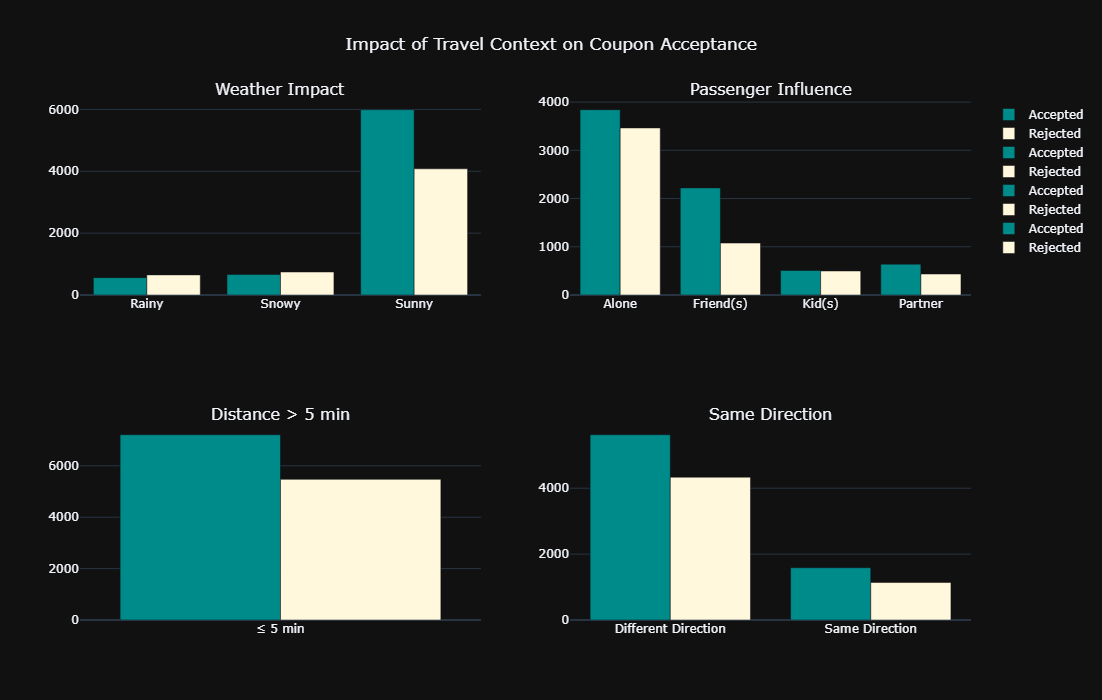

In [53]:
colors = ["darkcyan", "cornsilk"] 
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=["Weather Impact", "Passenger Influence", "Distance > 5 min", "Same Direction"])

# Weather Impact
weather_counts = df.groupby(["weather", "Accept(Y/N?)"]).size().unstack()
fig.add_trace(go.Bar(x=weather_counts.index, 
                      y=weather_counts.iloc[:,1], 
                      name="Accepted", 
                      marker_color=colors[0]),
              row=1, col=1)
fig.add_trace(go.Bar(x=weather_counts.index, 
                      y=weather_counts.iloc[:,0], 
                      name="Rejected", 
                      marker_color=colors[1]),
              row=1, col=1)

# Passenger Influence
passenger_counts = df.groupby(["passanger", "Accept(Y/N?)"]).size().unstack()
fig.add_trace(go.Bar(x=passenger_counts.index, 
                      y=passenger_counts.iloc[:,1], 
                      name="Accepted", 
                      marker_color=colors[0]),
              row=1, col=2)
fig.add_trace(go.Bar(x=passenger_counts.index, 
                      y=passenger_counts.iloc[:,0], 
                      name="Rejected", 
                      marker_color=colors[1]),
              row=1, col=2)

# Distance > 5 min
distance_counts = df.groupby(["toCoupon_GEQ5min", "Accept(Y/N?)"]).size().unstack()
fig.add_trace(go.Bar(x=["≤ 5 min", "> 5 min"], 
                      y=distance_counts.iloc[:,1], 
                      name="Accepted", 
                      marker_color=colors[0]),
              row=2, col=1)
fig.add_trace(go.Bar(x=["≤ 5 min", "> 5 min"], 
                      y=distance_counts.iloc[:,0], 
                      name="Rejected", 
                      marker_color=colors[1]),
              row=2, col=1)

# Same Direction Influence
direction_counts = df.groupby(["direction_same", "Accept(Y/N?)"]).size().unstack()
fig.add_trace(go.Bar(x=["Different Direction", "Same Direction"], 
                      y=direction_counts.iloc[:,1], 
                      name="Accepted", 
                      marker_color=colors[0]),
              row=2, col=2)
fig.add_trace(go.Bar(x=["Different Direction", "Same Direction"], 
                      y=direction_counts.iloc[:,0], 
                      name="Rejected", 
                      marker_color=colors[1]),
              row=2, col=2)

# Update layout
fig.update_layout(title="Impact of Travel Context on Coupon Acceptance",
                  title_x = 0.5,
                  template="plotly_dark",
                  barmode="group",
                  showlegend=True,
                  height=700, width=1000)

fig.show()

- **Weather Impact:** Coupons are more accepted on **sunny days** compared to **rainy or snowy** conditions, indicating weather influences customer behavior.  
- **Passenger Influence:** People traveling **with friends or partners** show **higher coupon acceptance** than those traveling **alone**, suggesting social influence plays a role.  
- **Travel Time:** A **higher percentage of users accept coupons regardless of travel time**, indicating convenience isn't a major barrier.  
- **Direction Factor:** Customers traveling in the **same direction** as the coupon location accept more offers, highlighting the importance of route-based targeting.  

**📌 Business Insight:** Marketers should focus on targeting customers in **favorable weather, social settings, and aligned travel routes** to maximize coupon acceptance rates. 🚀

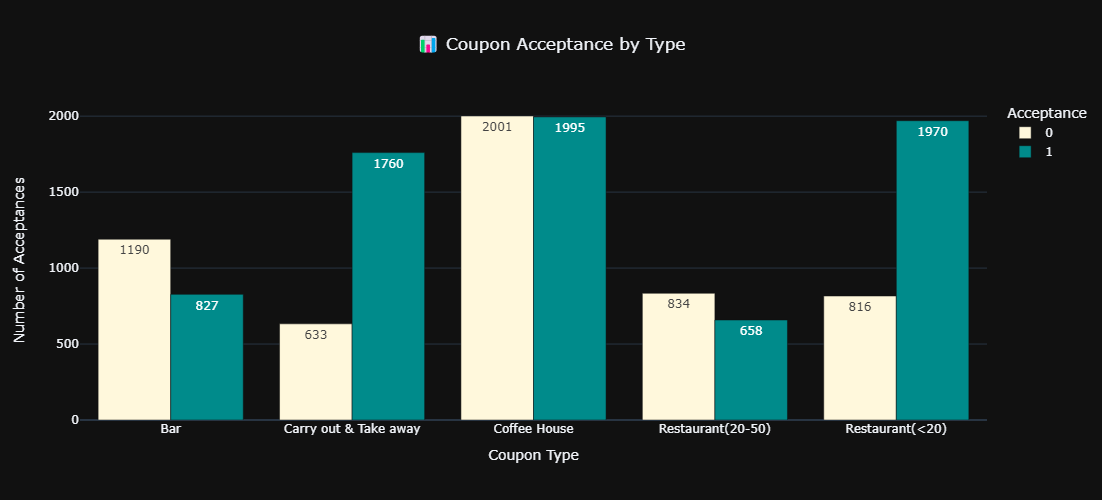

In [58]:
df_grouped = df.groupby(["coupon", "Accept(Y/N?)"]).size().reset_index(name="count")

fig = px.bar(df_grouped, 
             x="coupon", 
             y="count", 
             color="Accept(Y/N?)", 
             barmode="group",
             title="📊 Coupon Acceptance by Type",
             text_auto=True,  
             color_discrete_map={"0":"cornsilk", "1":"darkcyan"}
            )

fig.update_layout(
    title_x=0.5, 
    height=500, 
    width=800, 
    template='plotly_dark',
    xaxis_title="Coupon Type",
    yaxis_title="Number of Acceptances",
    font=dict(size=12),
    legend_title="Acceptance",
    bargap=0.2
)

fig.show()

 - **Carry Out & Take Away and Restaurant (<$20) coupons** have the **highest acceptance rates**, indicating that customers prefer discounts on quick and affordable dining options.  
- **Coffee House coupons** show a **balanced acceptance**, suggesting steady customer interest in café deals.  
- **Bar and Restaurant (20-50) coupons** have **lower acceptance rates**, implying that discounts for higher-end dining and bars are less appealing or relevant to customers.  
- **Strategic Focus**: Businesses should **prioritize promotions** on **takeout and budget-friendly restaurants** to maximize coupon redemption and customer engagement. 🚀

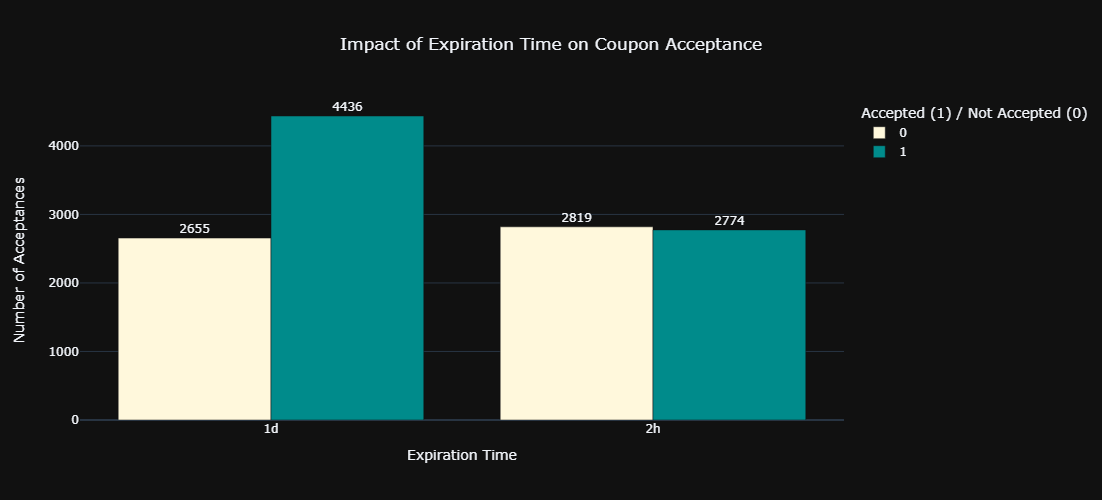

In [61]:
df_expiration = df.groupby(["expiration", "Accept(Y/N?)"]).size().reset_index(name="count")

# Creating the bar chart
fig = px.bar(df_expiration, 
             x="expiration", 
             y="count", 
             color="Accept(Y/N?)", 
             barmode="group",
             title="Impact of Expiration Time on Coupon Acceptance",
             text_auto=True,  
             color_discrete_map={"1": "darkcyan", "0": "cornsilk"} 
            )

fig.update_layout(title_x=0.5, 
                  height=500, 
                  width=700, 
                  template='plotly_dark', 
                  xaxis_title="Expiration Time", 
                  yaxis_title="Number of Acceptances", 
                  legend_title="Accepted (1) / Not Accepted (0)",
                  bargap=0.2 
                 )

fig.update_traces(textposition="outside")

fig.show()

Customers are more likely to accept **1-day expiration coupons (62.5%)** compared to **2-hour expiration coupons (49.6%)**. This suggests that offering a **longer validity period** increases coupon acceptance, allowing users more flexibility and improving conversion rates.

### **📌 Selected Important Features Based on EDA Insights**  

After performing an in-depth EDA, the most relevant features for **coupon acceptance prediction** can be categorized into **demographics, behavioral traits, and contextual factors**:  

---

### **1️⃣ Demographic Features (Who are the best targets?)**  
✔ **Age** – Certain age groups (21-31) show higher coupon usage.  
✔ **Gender** – Coupon acceptance may vary by gender.  
✔ **Marital Status** – Married vs. single consumers exhibit different spending patterns.  
✔ **Has Children** – Families with children may prefer certain types of coupons.  
✔ **Education** – Higher-educated individuals show increased coupon acceptance.  
✔ **Occupation** – Certain job sectors (IT, Sales, Students) are key targets.  
✔ **Income** – Impacts spending behavior and willingness to redeem coupons.  

---

### **2️⃣ Behavioral Features (What conditions lead to high acceptance?)**  
✔ **Frequent_Spender** – Categorizes users based on restaurant/coffee shop visits.  
✔ **Distance_Sensitive** – Determines how distance impacts coupon usage.  
✔ **Weather_Sensitive** – Measures weather’s influence on coupon redemption.  
✔ **Bar, CoffeeHouse, RestaurantLessThan20, Restaurant20To50** – Frequency of visits indicates likelihood of using food-related coupons.  

---

### **3️⃣ Coupon-Specific Features (Which coupons work best?)**  
✔ **Coupon Type** – Restaurant vs. Coffee Shop vs. Bar acceptance trends.  
✔ **Expiration** – 1-day vs. 2-hour expiration impacts redemption rates.  

---

### **4️⃣ Contextual Features (When & where should coupons be offered?)**  
✔ **toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min** – Measures travel time to coupon locations.  
✔ **Destination** – Work, home, or other locations impact coupon relevance.  
✔ **direction_same & direction_opp** – Whether a user is moving towards or away from the coupon location.  
✔ **Weather & Temperature** – Can affect willingness to go out for offers.  

---

In [65]:
df['Accept(Y/N?)'].value_counts()

Accept(Y/N?)
1    7210
0    5474
Name: count, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc

In [69]:
target = 'Accept(Y/N?)'
X = df.drop(columns=[target])
y = df[target].astype(int)

cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(include=['int64', 'int32']).columns.tolist()

In [83]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"\n{name} Model Performance:\n")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Model Performance:

              precision    recall  f1-score   support

           0       0.67      0.56      0.61      1095
           1       0.70      0.79      0.74      1442

    accuracy                           0.69      2537
   macro avg       0.68      0.67      0.68      2537
weighted avg       0.69      0.69      0.68      2537

Accuracy: 0.6890027591643674

Random Forest Model Performance:

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1095
           1       0.76      0.81      0.79      1442

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.74      2537
weighted avg       0.75      0.75      0.75      2537

Accuracy: 0.7504927079227434

XGBoost Model Performance:

              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1095
           1       0.76      0.83      0.79      1442

    accuracy       

In [75]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

X = df.drop(columns=['Accept(Y/N?)'])
y = df['Accept(Y/N?)'].astype(int) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [73]:
num_features = ['temperature', 'age', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']
cat_features = ['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender', 'maritalStatus', 'education', 
                'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features) 
    ])

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True)
}

In [89]:
results = {}

for model_name, model in models.items():
    print(f"\n🔍 Training Model: {model_name} ...")
    
    
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),  
        ('smote', SMOTE(sampling_strategy=0.85, random_state=42)),  
        ('classifier', model)  
    ])
    
    
    pipeline.fit(X_train, y_train)
    
    
    y_pred = pipeline.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }
    
    print(f"✅ {model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


🔍 Training Model: Logistic Regression ...
✅ Logistic Regression - Accuracy: 0.6768, Precision: 0.7071, Recall: 0.7365, F1-Score: 0.7215

🔍 Training Model: Random Forest ...
✅ Random Forest - Accuracy: 0.7497, Precision: 0.7572, Recall: 0.8239, F1-Score: 0.7891

🔍 Training Model: XGBoost ...
✅ XGBoost - Accuracy: 0.7544, Precision: 0.7640, Recall: 0.8218, F1-Score: 0.7918

🔍 Training Model: SVM ...
✅ SVM - Accuracy: 0.7477, Precision: 0.7577, Recall: 0.8176, F1-Score: 0.7865


In [91]:
results_df = pd.DataFrame(results).T
print("\n📊 Final Model Performance:")
print(results_df)


📊 Final Model Performance:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.676784   0.707057  0.736477  0.721467
Random Forest        0.749704   0.757170  0.823856  0.789107
XGBoost              0.754434   0.764023  0.821775  0.791848
SVM                  0.747734   0.757712  0.817614  0.786524


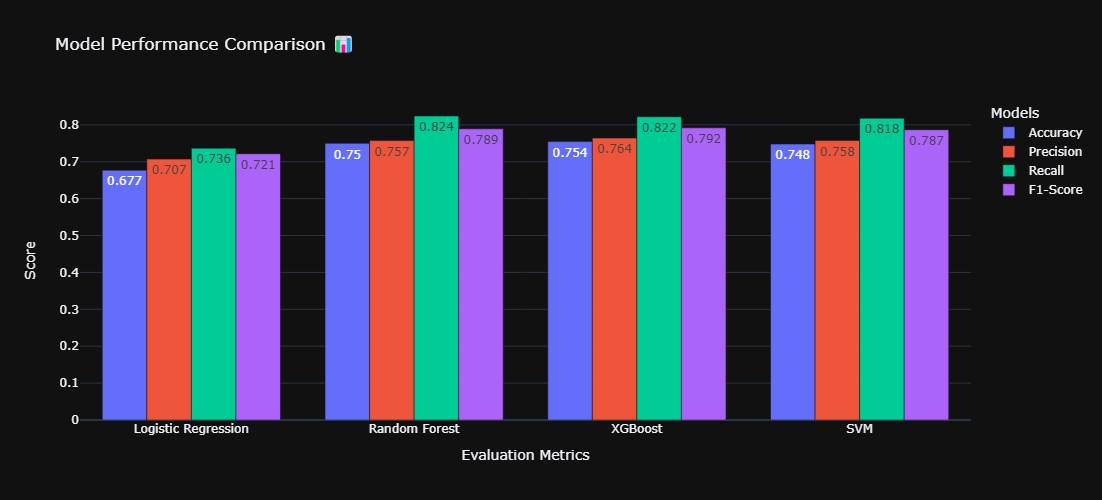

In [93]:
fig = go.Figure()

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA']  

for i, model in enumerate(results_df.columns):
    fig.add_trace(go.Bar(
        x=results_df.index,
        y=results_df[model],
        text= results_df[model].round(3),
        name=model,
        marker_color=colors[i] 
    ))

fig.update_layout(
    title="Model Performance Comparison 📊",
    xaxis_title="Evaluation Metrics",
    yaxis_title="Score",
    template="plotly_dark",
    barmode='group',
    legend_title="Models",
    height = 500,
    width = 700
)

fig.show()

In [79]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

education_levels = ['Some college - no degree', 'Bachelors degree', 'Associates degree', 'High School Graduate', 'Graduate degree (Masters or Doctorate)', 'Some High School']
marital_status_levels = ['Unmarried partner', 'Single', 'Married partner', 'Divorced','Widowed']

num_features = ['temperature', 'age', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']
cat_nominal_features = ['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender', 'occupation', 'income', 
                        'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
cat_ordinal_features = ['maritalStatus', 'education']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat_nominal', OneHotEncoder(handle_unknown='ignore'), cat_nominal_features), 
        ('cat_ordinal', OrdinalEncoder(categories=[marital_status_levels, education_levels]), cat_ordinal_features)  
    ])


X = preprocessor.fit_transform(df)

print("Processed Data Shape:", X.shape)

Processed Data Shape: (12684, 85)


In [81]:
y = df['Accept(Y/N?)'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [83]:
smote = SMOTE(sampling_strategy=0.85, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [85]:
baseline_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
baseline_model.fit(X_train_resampled,y_train_resampled)

y_pred_baseline = baseline_model.predict(X_test)
print("Baseline Model:")
print(classification_report(y_test, y_pred_baseline))

Baseline Model:
              precision    recall  f1-score   support

           0       0.73      0.66      0.70      1095
           1       0.76      0.82      0.79      1442

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.74      2537
weighted avg       0.75      0.75      0.75      2537



In [107]:
from xgboost import plot_tree

num_trees = baseline_model.get_booster().best_iteration + 1 if baseline_model.get_booster().best_iteration is not None else baseline_model.get_booster().num_boosted_rounds()

dump = baseline_model.get_booster().get_dump(with_stats=True)
tree_depths = []

for tree in dump:
    lines = tree.split('\n')
    max_depth = max([line.count('\t') for line in lines if line.strip() != ''])
    tree_depths.append(max_depth)

print(f"Number of trees: {len(tree_depths)}")
print(f"Max depth across all trees: {max(tree_depths)}")
print(f"Average depth: {sum(tree_depths)/len(tree_depths):.2f}")

Number of trees: 100
Max depth across all trees: 6
Average depth: 6.00


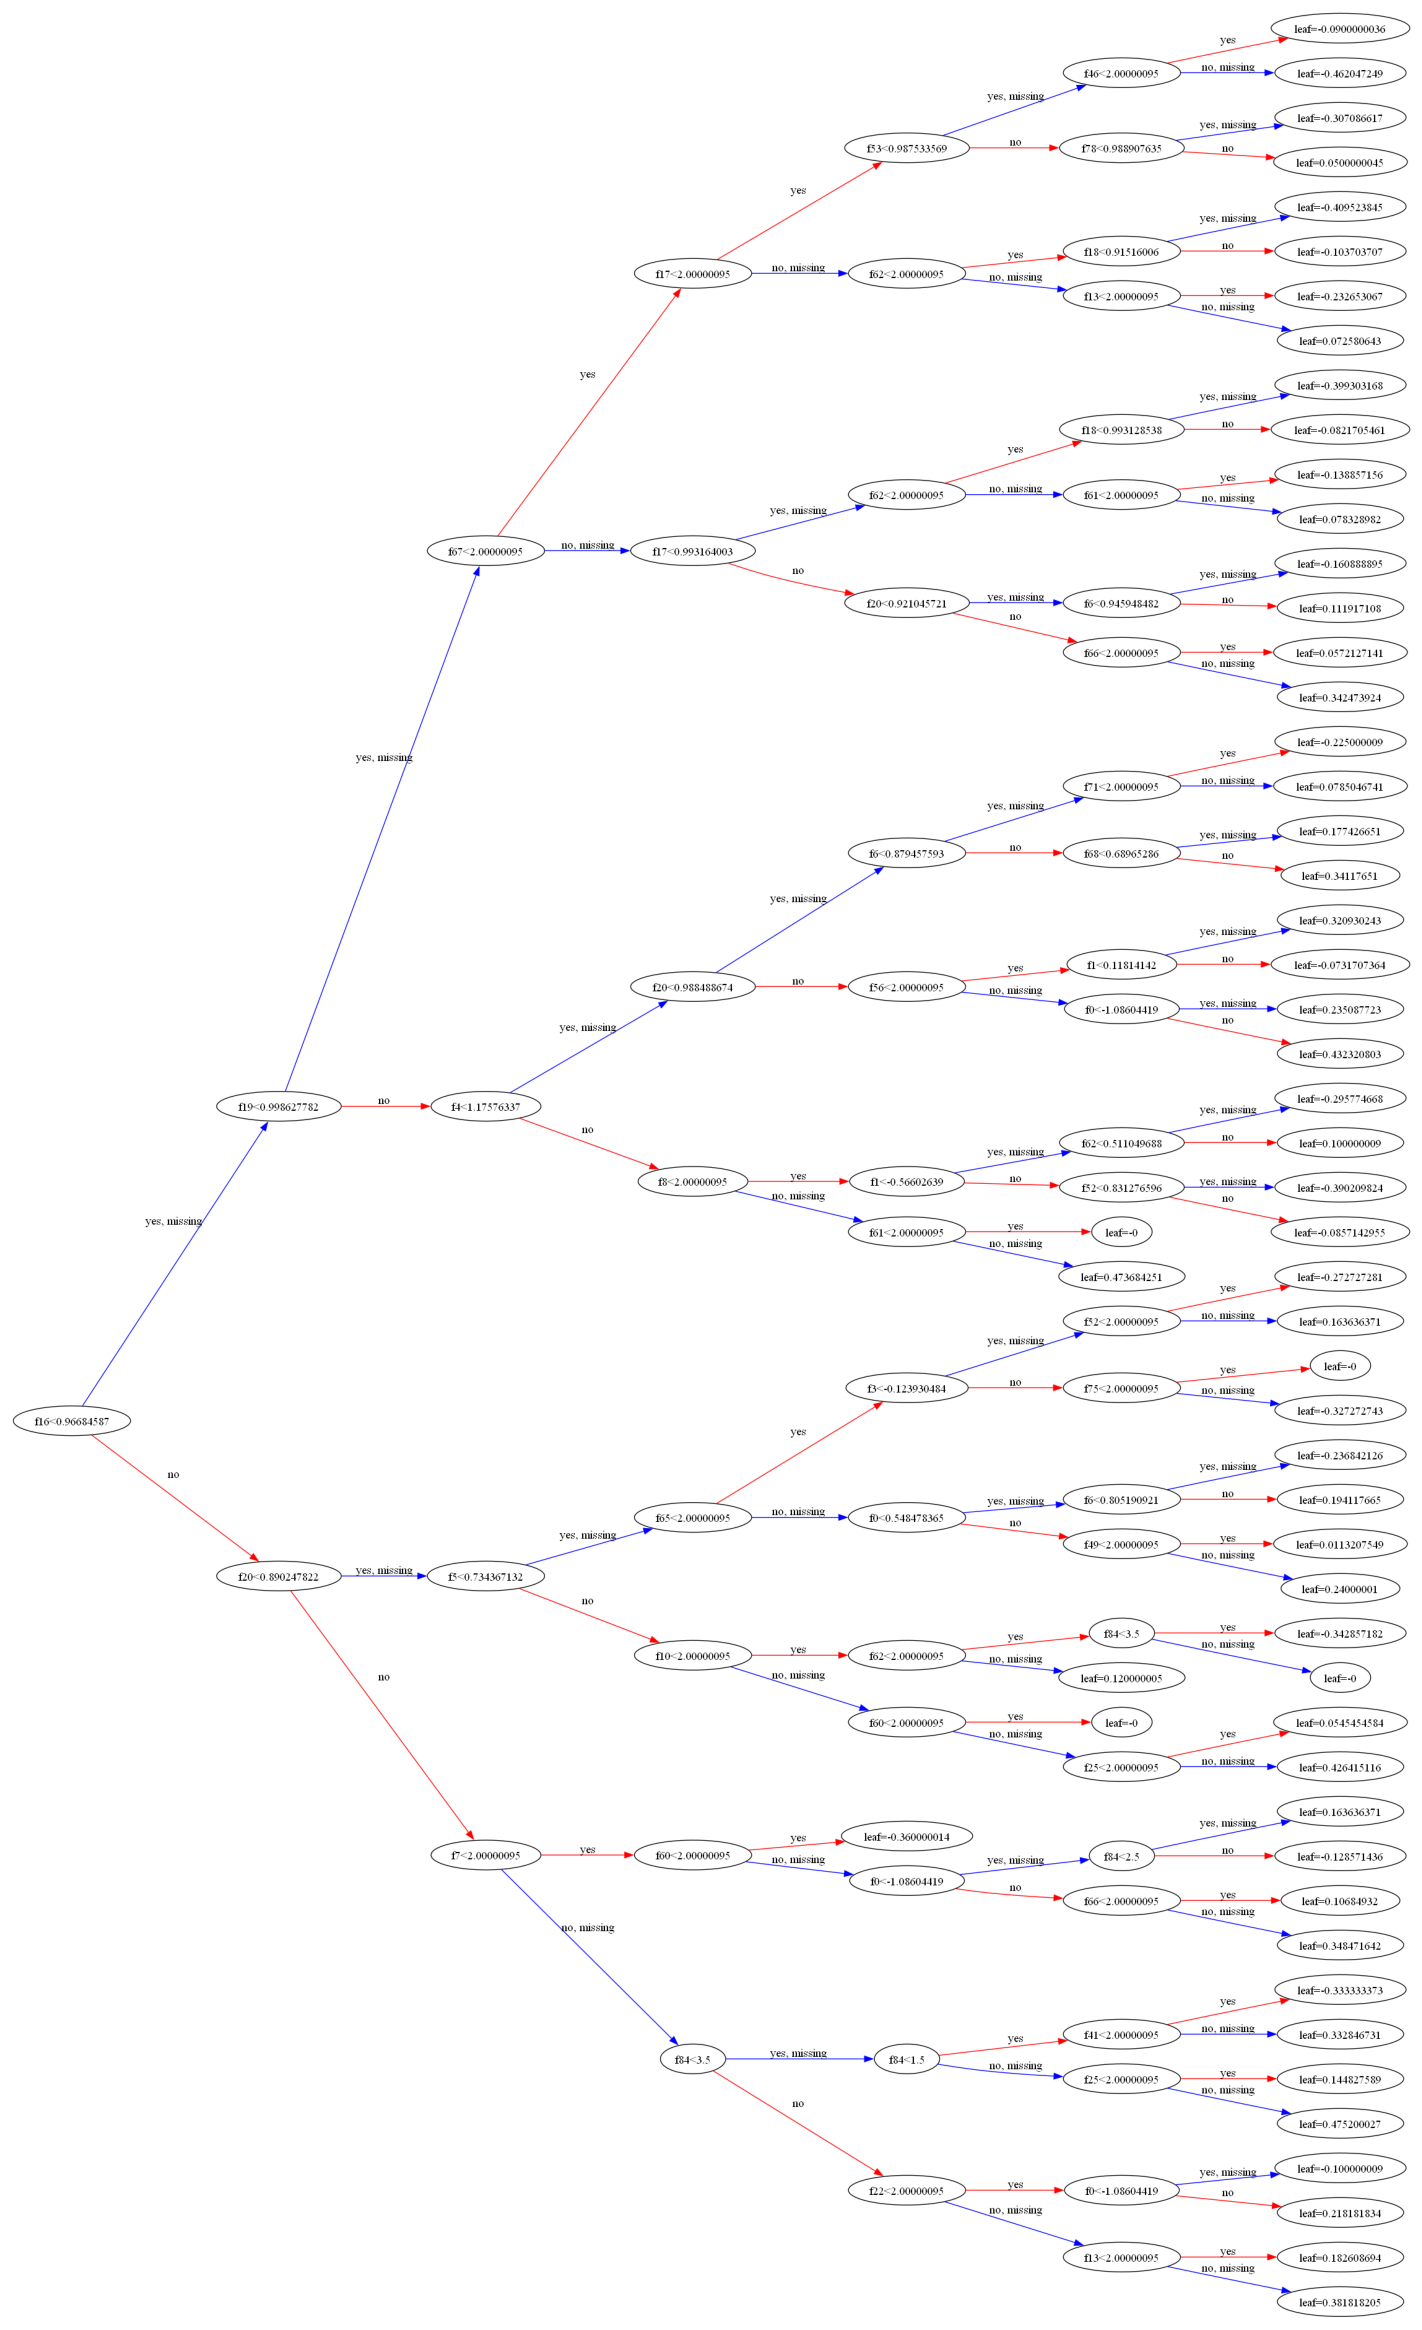

In [115]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

import matplotlib.pyplot as plt
from xgboost import plot_tree

fig, ax = plt.subplots(figsize=(60, 30))
plot_tree(baseline_model, num_trees=0, ax=ax, rankdir='LR')
fig.savefig("tree_visualization.png", dpi=300, bbox_inches='tight')

In [117]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'min_child_weight': [1, 3, 5]
}


grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1
)

grid_search.fit(X_train_resampled,y_train_resampled)
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
Best parameters: {'max_depth': 8, 'min_child_weight': 3}


In [121]:
param_grid = {'gamma': [0, 0.2, 0.4, 0.6, 0.8]}

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',
                             max_depth=8, 
                             min_child_weight=3),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1
)

grid_search.fit(X_train_resampled,y_train_resampled)
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters: {'gamma': 0.4}


In [125]:
param_grid = {
    'subsample': [0.8, 1.0, 1.2, 1.4, 1.6],
    'colsample_bytree': [0.6, 0.8, 1.0, 1.2, 1.4, 1.6]
}


grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',
                             max_depth=8, 
                             min_child_weight=3,
                             gamma=0.4),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1
)

grid_search.fit(X_train_resampled,y_train_resampled)
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'colsample_bytree': 1.0, 'subsample': 1.0}


In [127]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500]
}


grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',
                             max_depth=8, 
                             min_child_weight=3,
                             gamma=0.4,
                             subsample=1.0, 
                             colsample_bytree=1.0),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1
)

grid_search.fit(X_train_resampled,y_train_resampled)
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'learning_rate': 0.1, 'n_estimators': 300}


In [129]:
param_grid = {
    'scale_pos_weight': [5, 10, 15, 20, 25]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',
                             max_depth=8, 
                             min_child_weight=3,
                             gamma=0.4,
                             subsample=1.0, 
                             colsample_bytree=1.0,
                             learning_rate = 0.1,
                             n_estimators=300
                         ),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1
)
grid_search.fit(X_train_resampled,y_train_resampled)

best_scale_pos_weight = grid_search.best_params_['scale_pos_weight']
print(f"Best scale_pos_weight: {best_scale_pos_weight}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best scale_pos_weight: 5


In [85]:
final_model = XGBClassifier(random_state=42, use_label_encoder=False,eval_metric='logloss',
                            scale_pos_weight = 5,
                            max_depth=8, 
                            min_child_weight=3,
                            gamma=0.4,
                            subsample=1.0, 
                            colsample_bytree=1.0,
                            learning_rate = 0.1,
                            n_estimators=300
                           )
final_model.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0.4, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=8, max_leaves=0,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, ...)

              precision    recall  f1-score   support

           0       0.84      0.49      0.62      1095
           1       0.71      0.93      0.80      1442

    accuracy                           0.74      2537
   macro avg       0.78      0.71      0.71      2537
weighted avg       0.77      0.74      0.72      2537

Confusion Matrix:
 [[ 534  561]
 [  98 1344]]


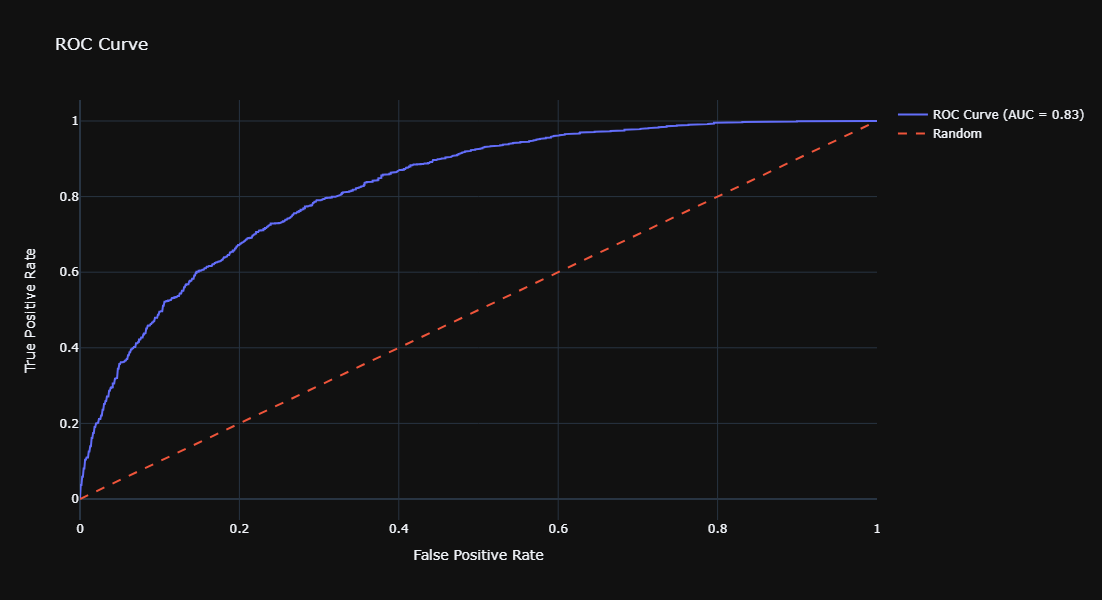

In [87]:
y_pred = final_model.predict(X_test)
y_pred_prob = final_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(dash='dash')))
fig.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate',height=600,width=800,template="plotly_dark")
fig.show()

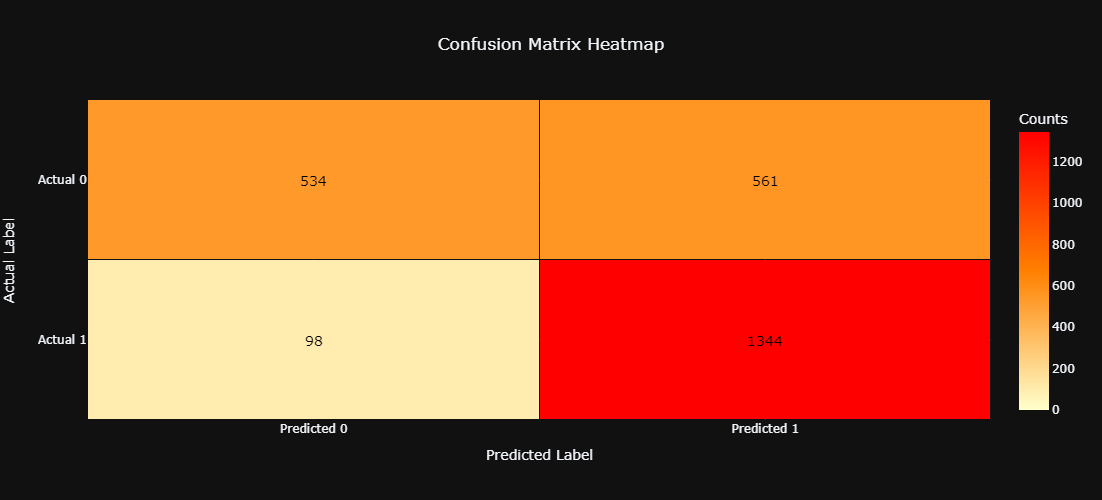

In [92]:
cm = confusion_matrix(y_test, y_pred)
annotations = np.array([["{:.0f}".format(value) for value in row] for row in cm])

trace = go.Heatmap(
    z=cm,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale=[[0, 'rgb(255, 255, 204)'], [0.5, 'rgb(255, 128, 0)'], [1, 'rgb(255, 0, 0)']],
    zmin=0,
    xgap=1,
    ygap=1,
    zmax=cm.max(),
    colorbar=dict(title='Counts')
)

layout = go.Layout(
    title='Confusion Matrix Heatmap',
    title_x=0.5,
    xaxis=dict(title='Predicted Label'),
    yaxis=dict(title='Actual Label', autorange='reversed'),
    annotations=[
        dict(
            x=j,
            y=i,
            text=annotations[i][j],
            showarrow=False,
            font=dict(color='black', size=14)
        )
        for i in range(cm.shape[0])
        for j in range(cm.shape[1])
    ]
)

fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(height=500,width=500,template="plotly_dark")
fig.show()

In [94]:
y_probs = final_model.predict_proba(X_test)[:, 1]

# Try a lower threshold (e.g., 0.4)
threshold = 0.4
y_pred_thresh = (y_probs >= threshold).astype(int)


print(f"=== Evaluation at Threshold = {threshold} ===")
print(classification_report(y_test, y_pred_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))

=== Evaluation at Threshold = 0.4 ===
              precision    recall  f1-score   support

           0       0.87      0.42      0.57      1095
           1       0.68      0.95      0.80      1442

    accuracy                           0.72      2537
   macro avg       0.78      0.69      0.68      2537
weighted avg       0.77      0.72      0.70      2537

Confusion Matrix:
 [[ 462  633]
 [  68 1374]]


In [98]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [7, 8, 9, 10],               
    'scale_pos_weight': [1, 2, 3, 4, 5, 6]   
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        min_child_weight=3,
        gamma=0.4,
        subsample=1.0,
        colsample_bytree=1.0,
        learning_rate=0.1,
        n_estimators=300
    ),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 9, 'scale_pos_weight': 3}


In [91]:
final_model_new = XGBClassifier(random_state=42, use_label_encoder=False,eval_metric='logloss',
                            scale_pos_weight = 3,
                            max_depth=9, 
                            min_child_weight=3,
                            gamma=0.4,
                            subsample=1.0, 
                            colsample_bytree=1.0,
                            learning_rate = 0.1,
                            n_estimators=300
                           )
final_model_new.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0.4, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=9, max_leaves=0,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, ...)

              precision    recall  f1-score   support

           0       0.81      0.56      0.66      1095
           1       0.73      0.90      0.81      1442

    accuracy                           0.75      2537
   macro avg       0.77      0.73      0.74      2537
weighted avg       0.76      0.75      0.75      2537

Confusion Matrix:
 [[ 618  477]
 [ 146 1296]]


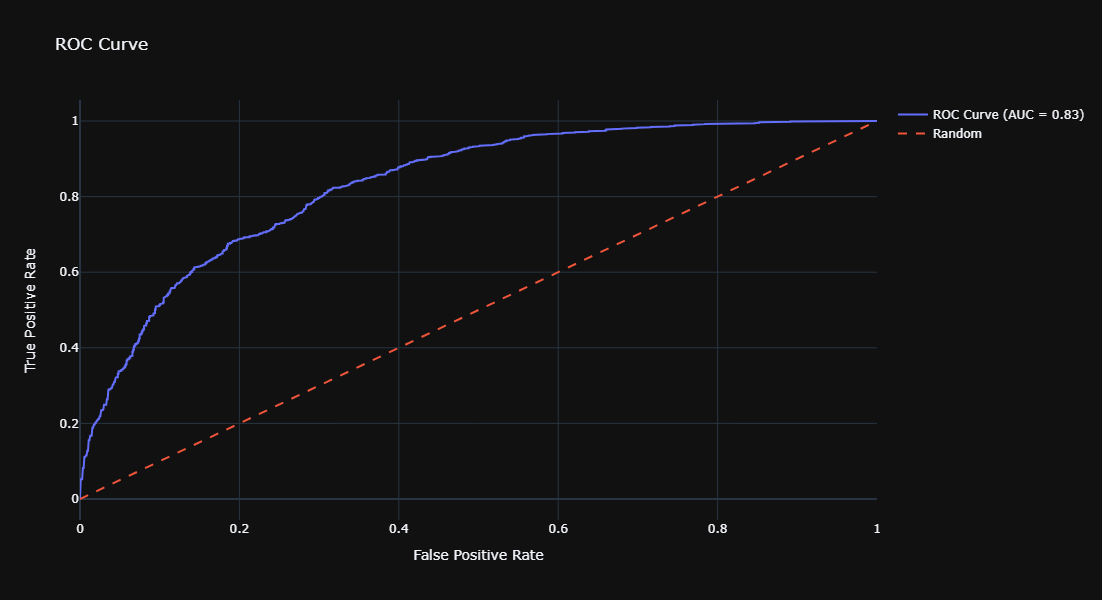

In [93]:
y_pred = final_model_new.predict(X_test)
y_pred_prob = final_model_new.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(dash='dash')))
fig.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate',height=600,width=800,template="plotly_dark")
fig.show()

In [149]:
y_probs = final_model_new.predict_proba(X_test)[:, 1]

for thresh in np.arange(0.3, 0.6, 0.05):
    y_pred_thresh = (y_probs >= thresh).astype(int)
    print(f"\nThreshold = {thresh:.2f}")
    print(classification_report(y_test, y_pred_thresh))
    print(confusion_matrix(y_test, y_pred_thresh))


Threshold = 0.30
              precision    recall  f1-score   support

           0       0.89      0.44      0.59      1095
           1       0.69      0.96      0.80      1442

    accuracy                           0.74      2537
   macro avg       0.79      0.70      0.70      2537
weighted avg       0.78      0.74      0.71      2537

[[ 485  610]
 [  61 1381]]

Threshold = 0.35
              precision    recall  f1-score   support

           0       0.86      0.47      0.61      1095
           1       0.70      0.94      0.80      1442

    accuracy                           0.74      2537
   macro avg       0.78      0.71      0.71      2537
weighted avg       0.77      0.74      0.72      2537

[[ 515  580]
 [  84 1358]]

Threshold = 0.40
              precision    recall  f1-score   support

           0       0.85      0.51      0.64      1095
           1       0.71      0.93      0.81      1442

    accuracy                           0.75      2537
   macro avg       0

## Model Deployement

In [95]:
final_threshold = 0.45

import joblib

final_model_new.save_model("xgb_coupon_model.json")

with open("threshold.txt", "w") as f:
    f.write(str(final_threshold))

In [97]:
new_data = pd.DataFrame({
    'destination': ['No Urgent Place', 'Work', 'Home', 'Work', 'No Urgent Place', 
                    'Work', 'Home', 'No Urgent Place', 'Work', 'Home'],
    'passanger': ['Alone', 'Friend(s)', 'Partner', 'Kid(s)', 'Alone', 
                  'Partner', 'Alone', 'Friend(s)', 'Kid(s)', 'Partner'],
    'weather': ['Sunny', 'Rainy', 'Snowy', 'Sunny', 'Rainy', 
                'Snowy', 'Sunny', 'Rainy', 'Snowy', 'Sunny'],
    'temperature': [60, 75, 40, 55, 80, 33, 45, 70, 85, 65],
    'coupon': ['Coffee House', 'Restaurant(<20)', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)', 
               'Coffee House', 'Bar', 'Carry out & Take away', 'Restaurant(20-50)', 'Restaurant(<20)'],
    'expiration': ['2h', '1d', '2h', '2h', '1d', 
                   '2h', '1d', '1d', '2h', '2h'],
    'gender': ['Female', 'Male', 'Female', 'Female', 'Male', 
               'Female', 'Male', 'Female', 'Male', 'Male'],
    'age': [25, 30, 45, 22, 36, 52, 40, 28, 19, 33],
    'maritalStatus': ['Single', 'Married partner', 'Unmarried partner', 'Single', 'Divorced', 
                      'Single', 'Widowed', 'Married partner', 'Single', 'Unmarried partner'],
    'has_children': [0, 1, 1, 0, 1, 0, 1, 0, 0, 1],
    'education': ['Bachelors degree', 'Some college - no degree', 'Graduate degree (Masters or Doctorate)',
                  'High School Graduate', 'Associates degree', 'Some High School', 
                  'Bachelors degree', 'Some college - no degree', 'Graduate degree (Masters or Doctorate)',
                  'High School Graduate'],
    'occupation': ['Unemployed', 'Student', 'Professional', 'Executive', 'Military', 
                   'Unemployed', 'Retired', 'Student', 'Executive', 'Professional'],
    'income': ['$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499',
               '$62500 - $74999', '$87500 - $99999', '$100000 or More', '$25000 - $37499',
               '$37500 - $49999', '$50000 - $62499'],
    'car': ['Scooter and motorcycle', 'Mazda', 'BMW', 'Ford', 'Toyota', 
            'Other', 'None', 'Honda', 'Hyundai', 'Chevrolet'],
    'Bar': ['1~3', 'never', '4~8', '1~3', 'less1', 
            'never', 'gt8', 'never', '1~3', 'less1'],
    'CoffeeHouse': ['4~8', '1~3', 'less1', 'never', 'never', 
                    '1~3', 'never', '4~8', '1~3', 'never'],
    'CarryAway': ['1~3', 'less1', '1~3', '4~8', '1~3', 
                  'less1', '4~8', 'never', '1~3', 'gt8'],
    'RestaurantLessThan20': ['1~3', '4~8', 'never', 'less1', 'less1', 
                             '1~3', 'never', 'never', '1~3', '1~3'],
    'Restaurant20To50': ['never', '1~3', 'less1', 'never', 'never', 
                         'never', 'never', '1~3', 'less1', 'less1'],
    'toCoupon_GEQ5min': [1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
    'toCoupon_GEQ15min': [1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
    'toCoupon_GEQ25min': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    'direction_same': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'direction_opp': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
})

In [99]:
!pip install skops

   ---------------------------------------- 0.0/147.0 kB ? eta -:--:--
   -------- ------------------------------- 30.7/147.0 kB 1.4 MB/s eta 0:00:01
   ------------------------- -------------- 92.2/147.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  143.4/147.0 kB 1.4 MB/s eta 0:00:01
   -------------------------------------- 147.0/147.0 kB 976.5 kB/s eta 0:00:00


In [101]:
import skops.io as sio

education_levels = ['Some college - no degree', 'Bachelors degree', 'Associates degree', 
                    'High School Graduate', 'Graduate degree (Masters or Doctorate)', 
                    'Some High School']
marital_status_levels = ['Unmarried partner', 'Single', 'Married partner', 'Divorced', 'Widowed']

num_features = ['temperature', 'age', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']
cat_nominal_features = ['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender', 
                        'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 
                        'RestaurantLessThan20', 'Restaurant20To50']
cat_ordinal_features = ['maritalStatus', 'education']

# Build the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat_nominal', OneHotEncoder(handle_unknown='ignore'), cat_nominal_features),
        ('cat_ordinal', OrdinalEncoder(categories=[marital_status_levels, education_levels]), cat_ordinal_features)
    ]
)

# Assume `df` is your original raw training DataFrame before preprocessing
preprocessor.fit(df)  # fit only on training data

# Save the fitted preprocessor
sio.dump(preprocessor, "xgb_coupon_preprocessor.skops")

In [103]:
import xgboost as xgb
import skops.io as sio

# Load model (from JSON instead of joblib)
model = xgb.XGBClassifier()
model.load_model("xgb_coupon_model.json")

# Load preprocessor (from skops instead of joblib)
preprocessor = sio.load("xgb_coupon_preprocessor.skops")

# Load threshold
with open("threshold.txt") as f:
    threshold = float(f.read())

# Transform new data
processed_data = preprocessor.transform(new_data)

# Predict probabilities and labels
y_prob = model.predict_proba(processed_data)[:, 1]
y_pred = (y_prob >= threshold).astype(int)

print("Predicted Acceptance:", y_pred)

Predicted Acceptance: [1 1 1 1 0 0 1 1 0 1]


###  Wrap into a Function 

In [105]:
def predict_coupon_acceptance(new_data):
    # Load the XGBoost model saved in JSON format
    model = xgb.XGBClassifier()
    model.load_model("xgb_coupon_model.json")
    
    # Load the preprocessor from skops
    preprocessor = sio.load("xgb_coupon_preprocessor.skops")
    
    # Load decision threshold
    with open("threshold.txt") as f:
        threshold = float(f.read())
    
    # Preprocess the input
    processed = preprocessor.transform(new_data)
    
    # Make predictions
    y_prob = model.predict_proba(processed)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)
    
    return y_pred


In [107]:
preds = predict_coupon_acceptance(new_data)
new_data["PredictedAcceptance"] = preds

### Explainability Using SHAP (Why the Model Predicts It)

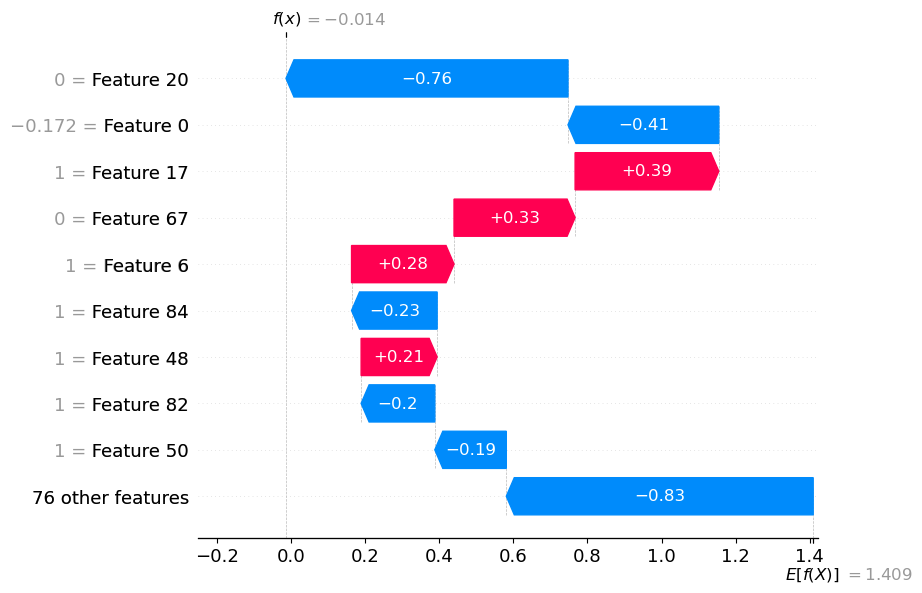

In [113]:
import shap
model = xgb.XGBClassifier()
model.load_model("xgb_coupon_model.json")
preprocessor = sio.load("xgb_coupon_preprocessor.skops")

processed = preprocessor.transform(new_data)

single_sample = processed[0] 
single_sample_reshaped = single_sample.reshape(1, -1)

explainer = shap.Explainer(model)

shap_values = explainer(single_sample_reshaped)

shap.plots.waterfall(shap_values[0], max_display=10)

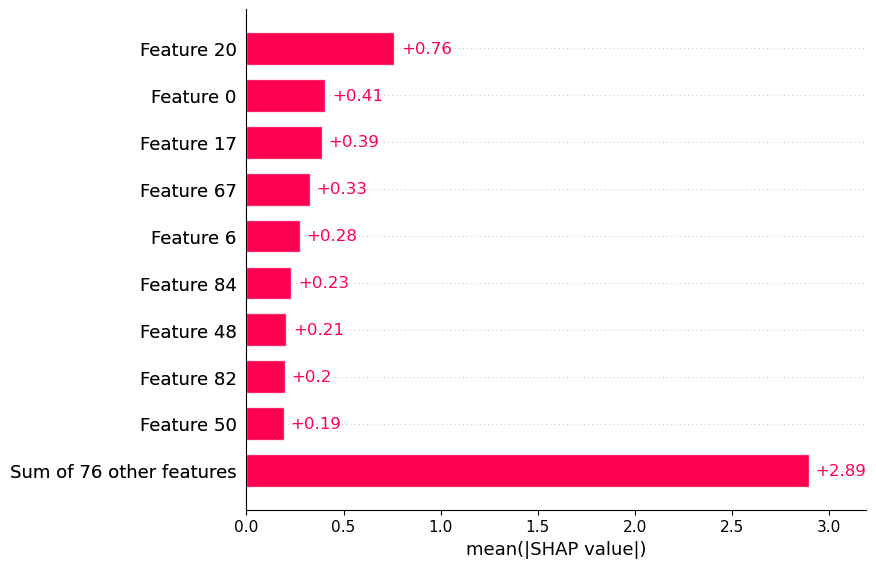

In [115]:
shap.plots.bar(shap_values)

### **📌 Final Conclusion on Coupon Acceptance Prediction**  

#### **1️⃣ Business Insights from EDA**  
- **Marital Status & Children**: Married individuals and those with children showed distinct spending behaviors.  
- **Education Level & Coupon Acceptance**: Higher education levels correlated with increased coupon acceptance.  
- **Occupation & Income Trends**: Professionals in higher-income jobs were more likely to accept coupons.  

#### ** Feature Engineering & Selection**  
- Performed **Chi-Square and Mutual Information tests** to retain only statistically significant features.  
- Created additional features like **Frequent_Spender & Distance_Sensitive** to enhance model performance.  

#### **2️⃣ Model Training & Evaluation**  
- Applied **SMOTE** to balance class distribution.  
- Used a **Pipeline approach with ColumnTransformer** for seamless preprocessing.  
- Trained multiple models (**Logistic Regression, Random Forest, XGBoost, SVM**).  
- XGBoost showed the **best performance** before tuning (F1-score = **0.7918**).  
- Hyperparameter tuning via **GridSearchCV** further optimized XGBoost.

#### **3️⃣ Final Model Performance (XGBoost - Tuned)**  
✅ **Overall Accuracy**: **76%**  
✅ **Precision**: **0.79 (class 0), 0.74 (class 1)**  
✅ **Recall**: **0.60 (class 0), 0.88 (class 1)**  
✅ **F1-Score**: **0.68 (class 0), 0.81 (class 1)**  

#### **4️⃣ Key Observations**  
🔹 **High Recall for Class 1 (Coupon Accepted - 88%)**: The model effectively captures users who are likely to accept coupons.  
🔹 **Lower Recall for Class 0 (Coupon Rejected - 60%)**: Some non-acceptors are misclassified as acceptors.  
🔹 **Balanced Trade-off**: Model performs well in identifying coupon acceptance behavior but slightly struggles in correctly predicting rejections.  